In [16]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
import numpy as np

# Load MNIST dataset
# mnist = tf.keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# # Save MNIST dataset to the current directory
# np.savez_compressed('dataset/mnist_dataset.npz',
#                     train_images=train_images,
#                     train_labels=train_labels,
#                     test_images=test_images,
#                     test_labels=test_labels)

# Load the dataset
mnist_dataset = np.load('dataset/mnist_dataset.npz')
train_images = mnist_dataset['train_images']
train_labels = mnist_dataset['train_labels']
test_images = mnist_dataset['test_images']
test_labels = mnist_dataset['test_labels']

# Normalize the pixel values from [0, 255] to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to include a channel dimension
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25), # Dropout added

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25), # Dropout added

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Increased dropout for dense layer
    layers.Dense(10, activation='softmax') # Use softmax for multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Updated to use softmax
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_24 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_49 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 10, 10, 64)      

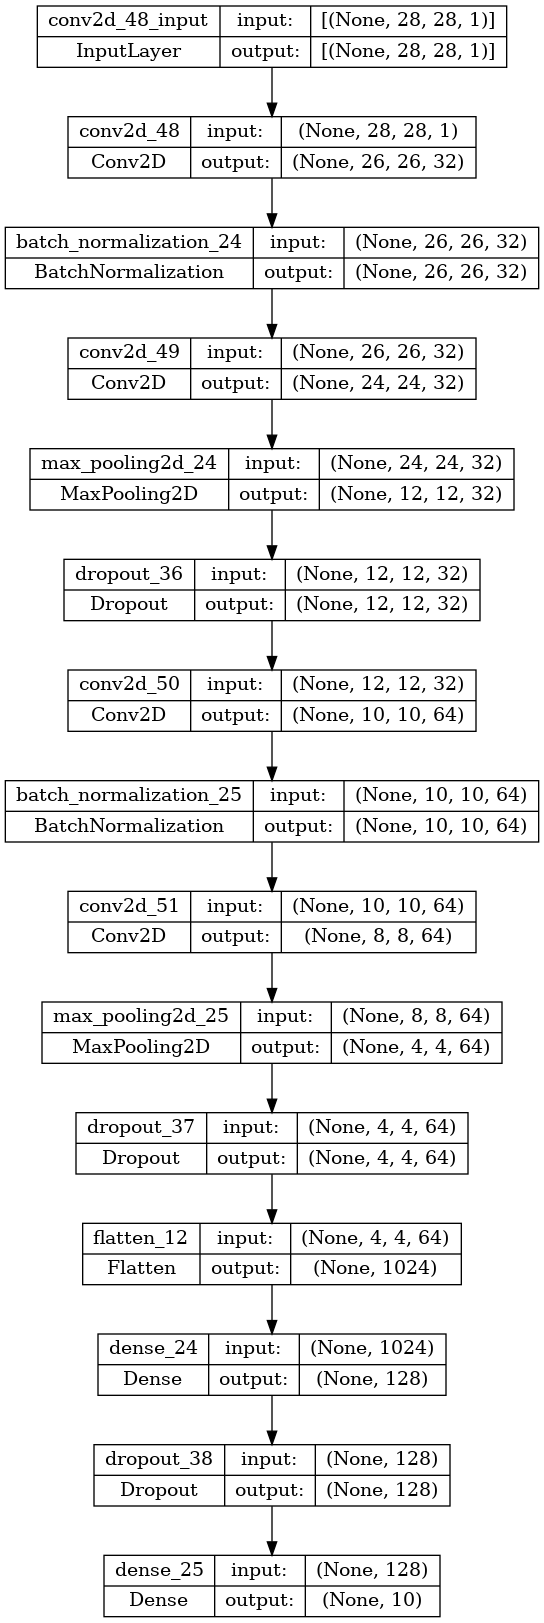

In [17]:
# Generate a plot of the model architecture-
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    zoom_range=0.2,  # randomly zoom into images
    fill_mode='nearest'  # fill in newly created pixels which can appear after a rotation or a width/height shift
)

# Fit the generator to your data
datagen.fit(train_images)

# Train the model
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          epochs=10,  # Number of epochs to train for
          validation_data=(test_images, test_labels))


Epoch 1/10


1875/1875 [==============================] - 18s 9ms/step - loss: 1.1048 - accuracy: 0.6155 - val_loss: 0.1246 - val_accuracy: 0.9600
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3777 - accuracy: 0.8865 - val_loss: 0.0953 - val_accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2432 - accuracy: 0.9302 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1971 - accuracy: 0.9452 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1661 - accuracy: 0.9546 - val_loss: 0.0472 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1547 - accuracy: 0.9578 - val_loss: 0.0361 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1403 - accuracy: 0.9635 - val_loss: 0.0367 - val_accuracy:

In [19]:
# Ouput the number of images in the training set
print("Number of training images: ", train_images.shape[0])
print("Number of test images: ", test_images.shape[0])

Number of training images:  60000
Number of test images:  10000


In [20]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0518 - accuracy: 0.9877 - val_loss: 0.0242 - val_accuracy: 0.9946
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0506 - accuracy: 0.9877 - val_loss: 0.0283 - val_accuracy: 0.9939
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0412 - accuracy: 0.9894 - val_loss: 0.0223 - val_accuracy: 0.9947
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0413 - accuracy: 0.9901 - val_loss: 0.0236 - val_accuracy: 0.9951
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0411 - accuracy: 0.9901 - val_loss: 0.0238 - val_accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0370 - accuracy: 0.9910 - val_loss: 0.0227 - val_accuracy: 0.9938
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0359 - accuracy: 0.9915 - val_loss: 0.0194 -

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0225 - accuracy: 0.9950 - 957ms/epoch - 3ms/step

Test accuracy: 0.9950000047683716


In [22]:
model.save('models/mnist_cnn_savedmodel')

!tensorflowjs_converter --input_format=tf_saved_model --output_node_names='softmax_tensor' models/mnist_cnn_savedmodel web/models/mnist_cnn_tfjs

INFO:tensorflow:Assets written to: models/mnist_cnn_savedmodel/assets


INFO:tensorflow:Assets written to: models/mnist_cnn_savedmodel/assets
/usr/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


2024-02-16 11:48:06.217648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 11:48:06.217676: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 11:48:06.218236: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 11:48:06.636999: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [23]:
# import tensorflow as tf
# import numpy as np

# # Load the image file
# image_path = '4.png'
# image_string = tf.io.read_file(image_path)

# # Decode the image, convert it to grayscale, and resize it
# img = tf.image.decode_image(image_string, channels=1)
# img = tf.image.resize(img, [28, 28])

# # Normalize the pixel values
# img_array = img / 255.0

# # Expand dimensions to fit the model input shape (1, 28, 28, 1)
# img_array = np.expand_dims(img_array, axis=0)

# # Make a prediction
# predictions = model.predict(img_array)

# # Get the predicted label
# predicted_label = np.argmax(predictions)

# print(f'Predicted label: {predicted_label}')